## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!b

In [363]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
import statsmodels.api as sm

%matplotlib inline

In [324]:
def read_and_concat(file):
    finaldf = pd.read_csv('nfl-combine/2000Offense.csv')
    for i in file:
        df = pd.read_csv(i)
        finaldf = finaldf.append(df)
        finaldf.reset_index(drop=True, inplace = True)
    return finaldf

In [325]:
draft = ['nfl-combine/2000Defense.csv',
'nfl-combine/2001Defense.csv',
'nfl-combine/2001Offense.csv',
'nfl-combine/2002Defense.csv',
'nfl-combine/2002Offense.csv',
'nfl-combine/2003Defense.csv',
'nfl-combine/2003Offense.csv',
'nfl-combine/2004Offense.csv',
'nfl-combine/2005Defense.csv',
'nfl-combine/2005Offense.csv',
'nfl-combine/2006Defense.csv',
'nfl-combine/2006Offense.csv',
'nfl-combine/2007Defense.csv',
'nfl-combine/2007Offense.csv',
'nfl-combine/2008Defense.csv',
'nfl-combine/2008Offense.csv',
'nfl-combine/2009Defense.csv',
'nfl-combine/2009Offense.csv',
'nfl-combine/2010Defense.csv',
'nfl-combine/2010Offense.csv',
'nfl-combine/2011Defense.csv',
'nfl-combine/2011Offense.csv',
'nfl-combine/2012Defense.csv',
'nfl-combine/2012Offense.csv',
'nfl-combine/2013Defense.csv',
'nfl-combine/2013Offense.csv',
'nfl-combine/2014Defense.csv',
'nfl-combine/2014Offense.csv',
'nfl-combine/2015Defense.csv',
'nfl-combine/2015Offense.csv',
'nfl-combine/2016Defense.csv',
'nfl-combine/2016Offense.csv',
'nfl-combine/2017Defense.csv',
'nfl-combine/2017Offense.csv']

In [326]:
df = read_and_concat(draft)

In [365]:
df.head()

,Year,Pos,School,Height,Wt,40YD,Vertical,BenchReps,Broad_Jump,3Cone,Shuttle,DraftRd,Drafted
0,2000,WR,Iowa,75,191,4.53,33.0,NaN,130.0,7.09,4.18,8,0
1,2000,QB,Texas State,75,229,4.91,34.0,NaN,108.0,7.71,4.59,6,1
2,2000,WR,Marshall,71,180,4.59,36.0,NaN,123.0,7.22,4.16,6,1
3,2000,OT,Arkansas,76,332,5.26,29.0,28.0,97.0,7.78,4.72,2,1
4,2000,RB,Ohio State,71,193,4.50,NaN,NaN,NaN,NaN,NaN,5,1


In [327]:
df.drop(columns = ['Rk', 'College', 'Player', 'AV'], inplace = True)

In [423]:
df = df.rename(columns = {'Broad Jump':'Broad_Jump', '40YD': 'Forty', '3Cone': 'Cone'})

In [328]:
def convert_height(x):
    feet = x.split("-")[0]
    inches = x.split("-")[1]
    height = (int(feet) * 12) + int(inches)
    return height
df['Height'] = df['Height'].apply(convert_height)

In [329]:
df["Drafted (tm/rnd/yr)"] = df["Drafted (tm/rnd/yr)"].where(pd.notnull(df["Drafted (tm/rnd/yr)"]), None)
df["DraftRd"] = [x.split(" / ")[1] if x != None else None for x in df["Drafted (tm/rnd/yr)"]]
df["DraftRd"] = df["DraftRd"].str.replace('[a-zA-Z]+', '')
df = df.drop(["Drafted (tm/rnd/yr)"], axis=1)

In [330]:
df['DraftRd'] = df['DraftRd'].fillna(8)
df = df.apply(pd.to_numeric, errors='ignore')

df['Drafted'] = df['DraftRd'].apply(lambda x: 0 if x == 8 else 1)


In [424]:
df2 = df

In [425]:
df2.columns

Index(['Year', 'Pos', 'School', 'Height', 'Wt', 'Forty', 'Vertical',
       'BenchReps', 'Broad_Jump', 'Cone', 'Shuttle', 'DraftRd', 'Drafted'],
      dtype='object')

## Statistic Tests

In [351]:
tests = ['Forty', 'Vertical', 'BenchReps', 'Broad_Jump', 'Cone', 'Shuttle']

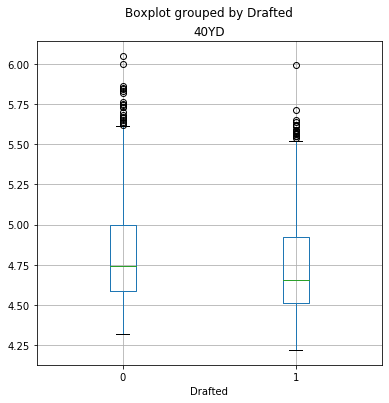

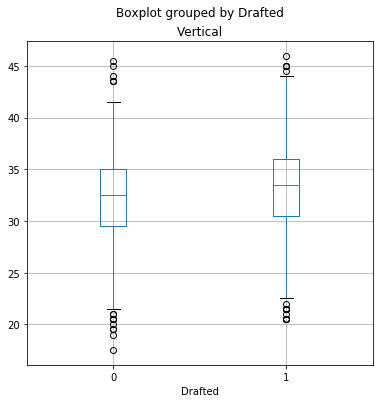

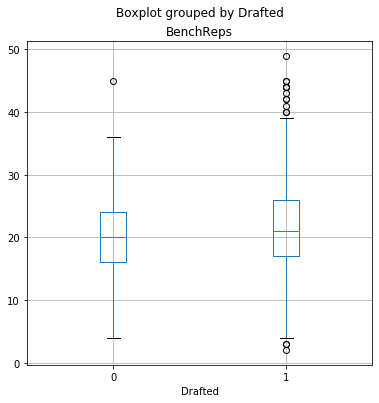

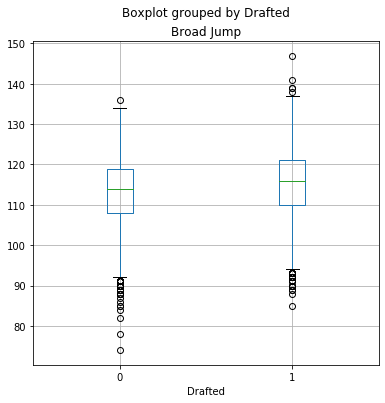

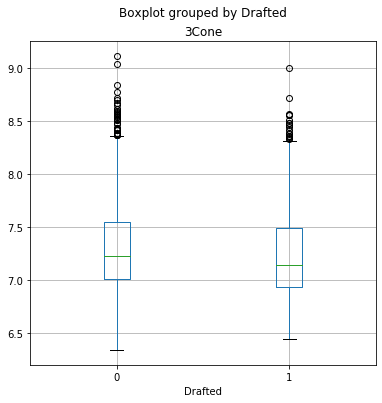

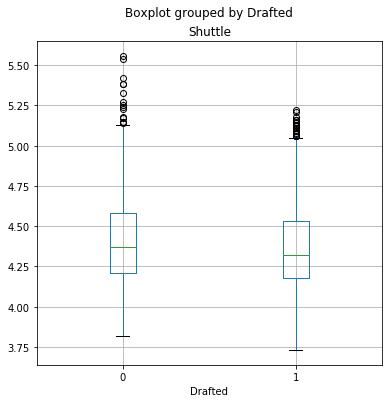

In [352]:
for col in tests:
    df2.boxplot(col, by='Drafted', figsize=(6,6))

In [426]:
# ANOVA
anova_skills = ols('Drafted ~ Vertical + BenchReps + Broad_Jump + Shuttle + Forty + Cone', data=df2).fit()
anova_table = sm.stats.anova_lm(anova_skills, type=2)
print(anova_table)

                df      sum_sq    mean_sq          F        PR(>F)
Vertical       1.0   10.724929  10.724929  51.457924  9.527918e-13
BenchReps      1.0   17.640765  17.640765  84.639926  7.200265e-20
Broad_Jump     1.0    4.789243   4.789243  22.978660  1.731587e-06
Shuttle        1.0    1.408306   1.408306   6.757014  9.391478e-03
Forty          1.0    3.332972   3.332972  15.991510  6.542368e-05
Cone           1.0    0.082749   0.082749   0.397029  5.286837e-01
Residual    2567.0  535.017540   0.208421        NaN           NaN


In [361]:
corr = df2.corr()
corr

,Year,Height,Wt,40YD,Vertical,BenchReps,Broad Jump,3Cone,Shuttle,DraftRd,Drafted
Year,1.000000,0.005959,-0.011689,-0.111254,0.070951,0.101784,0.092472,0.018301,0.050215,-0.024324,0.030910
Height,0.005959,1.000000,0.711502,0.222091,-0.116391,0.135076,-0.109003,0.092749,0.093026,-0.061813,0.034558
Wt,-0.011689,0.711502,1.000000,0.349537,-0.145141,0.398454,-0.127339,0.123878,0.126994,-0.051364,0.042185
40YD,-0.111254,0.222091,0.349537,1.000000,0.060975,0.137151,0.083356,0.168416,0.174248,0.035273,-0.027035
Vertical,0.070951,-0.116391,-0.145141,0.060975,1.000000,0.176287,0.889448,0.625247,0.638768,-0.026400,0.057435
BenchReps,0.101784,0.135076,0.398454,0.137151,0.176287,1.000000,0.176992,0.207691,0.212082,-0.049855,0.083816
Broad Jump,0.092472,-0.109003,-0.127339,0.083356,0.889448,0.176992,1.000000,0.648425,0.659912,-0.010373,0.042469
3Cone,0.018301,0.092749,0.123878,0.168416,0.625247,0.207691,0.648425,1.000000,0.913052,0.030527,0.013117
Shuttle,0.050215,0.093026,0.126994,0.174248,0.638768,0.212082,0.659912,0.913052,1.000000,0.028033,0.007254
DraftRd,-0.024324,-0.061813,-0.051364,0.035273,-0.026400,-0.049855,-0.010373,0.030527,0.028033,1.000000,-0.786974


In [ ]:

# graphs
# dummy school
#dummy position
# dummy year